In [1]:
cd ..

/gpfs/home/gdb20/code/mol-maker


In [2]:
import numpy as np
import os
import molecule as mol
import utilities as util
import mol_tree as mt 
import unitcell

In [3]:
#once we have optimized and written our structures, 
#we can just start from this cell. 

#this loads all the molecule fragments from the library of json files
path = 'data/lib/gen'
lib = {}
for file in [file for file in os.listdir(path) if not file.startswith('.')]:
    mol_obj = mol.Molecule(filename=f'{path}/{file}')
    copied_mol = mol_obj.copy()
    lib[file.split('.')[0]] = copied_mol



In [ ]:
h2so4 = mol.Molecule().add_atoms({
    'S1' : [0.000,0.000,0.000],
    'O2' : [1.000,1.000,1.000],
    'O3' : [1.000,-1.000,-1.000],
    'O4' : [-1.00,1.000,-1.000],
    'O5' : [-1.00,-1.000,1.000],
    'H6' : [2.000,-1.000,-1.000],
    'H7' : [2.000,1.000,1.000],
}).set_name('H2SO4').gfn2opt()
h2so4.write_json()
hso4 = h2so4.remove_atoms(['H7']).set_name('HSO4')\
    .add_bonding_site('1',['O2','S1','O3'])
hso4.write_json()
so4 = hso4.remove_atoms(['H6']).set_name('SO4')
so4.write_json()

#check that our structures came out okay!
hso4.show()
so4.show()

In [ ]:
#this really should take atoms in a """ string, in a known format
hco3 = mol.Molecule().add_atoms({
    'C1' : [0.000,0.000,0.000],
    'O2' : [0.000,0.000,1.400],
    'O3' : [1.000,0.000,-1.000],
    'O4' : [-1.000,0.000,-1.000],
    'H5' : [2.000,0.000,0.000],
}).set_name('HCO3').gfn2opt().add_bonding_site('1',['O2','C1','O3'])
hco3.write_json()
co3 = hco3.remove_atoms(['H5']).set_name('CO3')
co3.write_json()

#check that our structures came out okay!
hco3.show()
co3.show()

In [ ]:
#show building cf3so3h and cf3so3 here.
hso4 = lib['HSO4']
so4 = lib['SO4']
hco3 = lib['HCO3'] #do carboxylic acids as well
co3 = lib['CO3']

cf4 = lib['sp3'].copy()
cf4 = cf4.replace_atoms([('H','F')])
print('atoms replaced')
cf4.show(show_labels=True)
cf4.set_name('CF4').gfn2opt(print_log=True)
cf4.write_json()
print('CF4 step finished')
#bs means 'bonding site', choose where to make a bond
write_dir = 'data/kimberley/'
cf3so3h = cf4.bs('1').add_group(hso4.bs('1'),bond_length=2)\
    .gfn2opt(print_log=True).set_name('HSO3_CF2_0_CF3') 
#this name chosen for uniformity with longer chains
#easier for automation
cf3so3h.write_xyz(directory=write_dir)
print('HSO3CF3 step finished')

cf3so3 = cf4.bs('1').add_group(so4.bs('1'),bond_length=2)\
    .gfn2opt(charge=-1,print_log=True).set_name('SO3_CF2_0_CF3')
cf3so3.write_xyz(directory=write_dir)
print('SO3CF3 step finished')

#check our structures!
cf4.show(show_labels=True)
cf3so3h.show()
cf3so3.show()

cf3co2h = cf4.bs('1').add_group(hco3.bs('1'))\
    .set_name('HCO2_CF2_0_CF3').gfn2opt()
cf3co2h.write_xyz(directory=write_dir)


In [ ]:

cf3co2 = cf4.bs('1').add_group(co3.bs('1'))\
    .set_name('CO2_CF2_0_CF3').gfn2opt(charge=-1)
cf3co2.write_xyz(directory=write_dir)

#check our carboxylic structures as well!
cf3co2.show()
cf3co2h.show()

In [4]:
#START HERE WHEN REDOING
write_dir = 'data/kimberley/'
#These fragments are used to build everything
hso4 = lib['HSO4']
so4 = lib['SO4']
hco3 = lib['HCO3'] #do carboxylic acids as well
co3 = lib['CO3']

cf4 = lib['CF4']
cf3_frag = cf4.remove_atoms(['F2'])
cf3so3h = mol.Molecule(filename='data/kimberley/HSO3_CF2_0_CF3.xyz')
cf3so3h.sites = cf4.sites
cf3so3 = mol.Molecule(filename='data/kimberley/SO3_CF2_0_CF3.xyz')
cf3so3.sites = cf4.sites

cf3co2h = mol.Molecule(filename='data/kimberley/HCO2_CF2_0_CF3.xyz')
cf3co2h.sites = cf4.sites
cf3co2 = mol.Molecule(filename='data/kimberley/CO2_CF2_0_CF3.xyz')
cf3co2.sites = cf4.sites


In [11]:

#################################Intact PFOS####################
#chains of length one already written and used as starting points for these
#also a little brutal, but it gets it done

def iterate_write_pfacid_chains(starting_structure,chain_group,\
                      head_name,max_chain_length,write_directory):
    #this is a bit brutal, could definitely be made better
    mol_accum = starting_structure.copy()
    mol_accum.set_name(f"{head_name}_CF2_0_CF3").write_xyz(directory=write_directory)
    for i in range(0,max_chain_length-1):
        name = f"{head_name}_CF2_{i+1}_CF3"
        
        mol_accum = chain_group.bs('1').join(mol_accum.bs('2'))
        
        mol_accum.set_name(name).write_xyz(directory=write_directory)
        #mol_accum.show()


intact_sulfonic_acids_dir = 'data/kimberley/intact_sulfonic_acids'
intact_sulfonates_dir = 'data/kimberley/intact_sulfonates'

intact_carboxylic_acids_dir = 'data/kimberley/intact_carboxylic_acids'
intact_carboxylates_dir = 'data/kimberley/intact_carboxylates'
#SO3H
iterate_write_pfacid_chains(cf3so3h,cf4,'HSO3',8,intact_sulfonic_acids_dir)
#SO3
iterate_write_pfacid_chains(cf3so3,cf4,'SO3',8,intact_sulfonates_dir)
#CO2H
iterate_write_pfacid_chains(cf3co2h,cf4,'HCO2',8,intact_carboxylic_acids_dir)
#CO2
iterate_write_pfacid_chains(cf3co2,cf4,'CO2',8,intact_carboxylates_dir)



In [14]:

#####FOR C-C BDES (ALKYL RADICALS, NO SULFONYL GROUP)################

#we don't define a function here because we're only doing this once.
#it doesn't need to be generalized 
fragment_dir = 'data/kimberley/perfluoroalkyl_fragments'

cf3_frag = cf4.remove_atoms(['F2'])
cf3_frag.name = "CF3_CF2_0"
cf3_frag.write_xyz(directory=fragment_dir)
frag_accumulator = cf3_frag.copy()
for i in range(0,7):
    name = f"CF3_CF2_{i+1}"
    frag_accumulator = cf4.bs('1').join(frag_accumulator.bs('2'))
    frag_accumulator.name = name
    frag_accumulator.write_xyz(directory=fragment_dir)

FINDING DIHEDRAL ANGLE FAILED


In [6]:
####################C-C BDEs and terminal C-F BDEs#################


def iterate_write_pfacid_frags(starting_structure,chain_group,frag_group,\
                      head_name,max_chain_length,write_directory):
    starting_structure.set_name(f"{head_name}_CF2_0_CF2").write_xyz(directory=write_dir)
    for i in range(0,max_chain_length-1):
        frag_acc = starting_structure.copy()
        name = f"{head_name}_CF2_{i+1}_CF2"
        for j in range(0,i):
            frag_acc = chain_group.bs('1').join(frag_acc.bs('2'))
        
        frag_acc = frag_group.bs('1').join(frag_acc.bs('2'))
        #frag_acc.show()
        frag_acc.set_name(name).write_xyz(directory=write_directory)

sulfonic_acid_fragments_dir = 'data/kimberley/sulfonic_acid_fragments'
sulfonate_fragments_dir = 'data/kimberley/sulfonate_fragments'

carboxylic_acid_fragments_dir = 'data/kimberley/carboxylic_acid_fragments'
carboxylate_fragments_dir = 'data/kimberley/carboxylate_fragments'
#RSO3H
cf2so3h = cf3so3h.remove_atoms(['F2'])
iterate_write_pfacid_frags(cf3so3h,cf4,cf3_frag,'HSO3',8,sulfonic_acid_fragments_dir)

#RSO3
cf2so3 = cf3so3.remove_atoms(['F2'])
iterate_write_pfacid_frags(cf3so3,cf4,cf3_frag,'SO3',8,sulfonate_fragments_dir)

#RCO2H
cf2co2h = cf3co2h.remove_atoms(['F2'])
iterate_write_pfacid_frags(cf3co2h,cf4,cf3_frag,'HCO2',8,carboxylic_acid_fragments_dir)

#RCO2
cf2co2 = cf3co2.remove_atoms(['F2'])
iterate_write_pfacid_frags(cf3co2,cf4,cf3_frag,'CO2',8,carboxylate_fragments_dir)


FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED
FINDING DIHEDRAL ANGLE FAILED


shown below: HSO3_CF2_6_CF_CF2_0_CF3


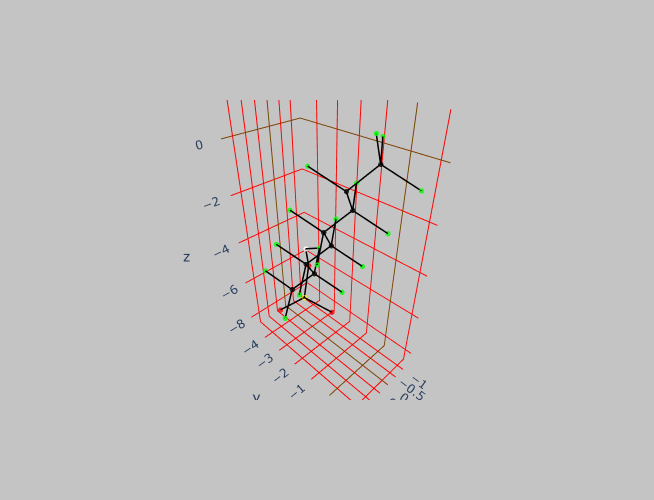

shown below: HSO3_CF2_5_CF_CF2_1_CF3


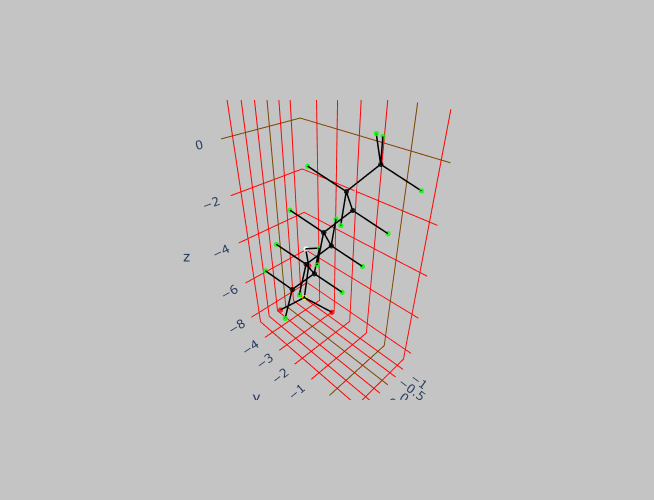

shown below: HSO3_CF2_4_CF_CF2_2_CF3


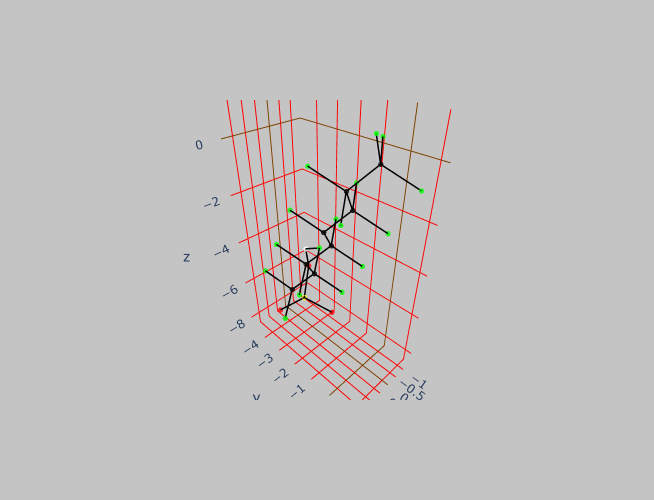

shown below: HSO3_CF2_3_CF_CF2_3_CF3


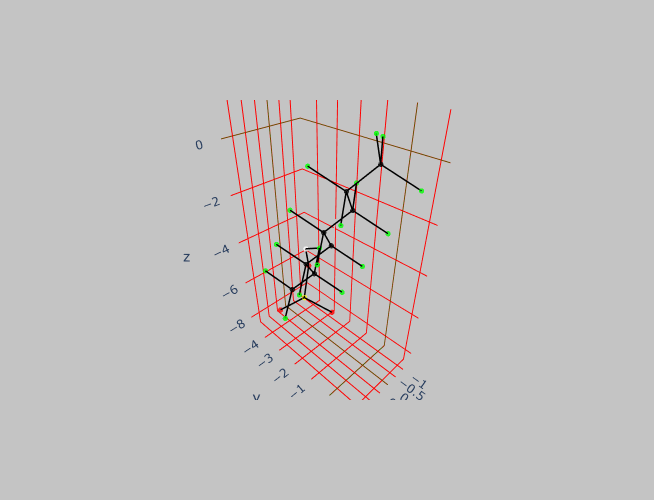

shown below: HSO3_CF2_2_CF_CF2_4_CF3


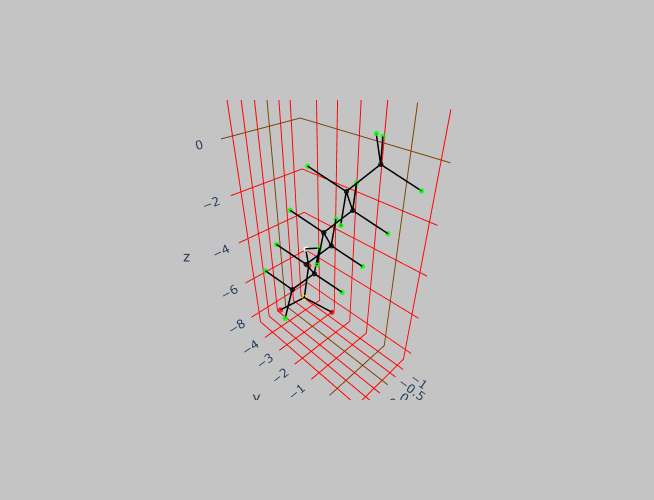

shown below: HSO3_CF2_1_CF_CF2_5_CF3


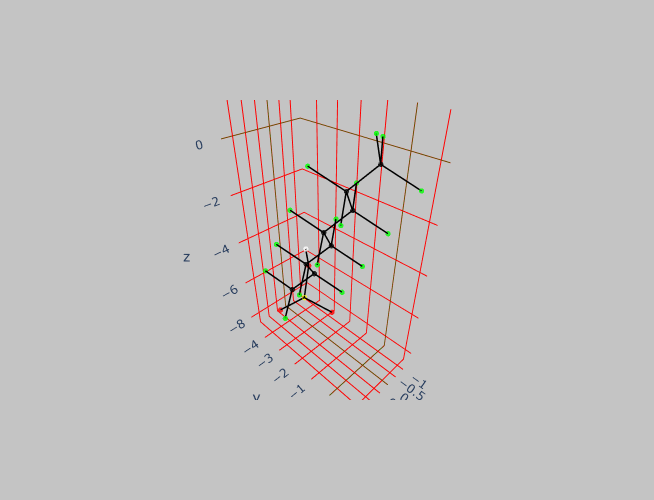

shown below: HSO3_CF2_0_CF_CF2_6_CF3


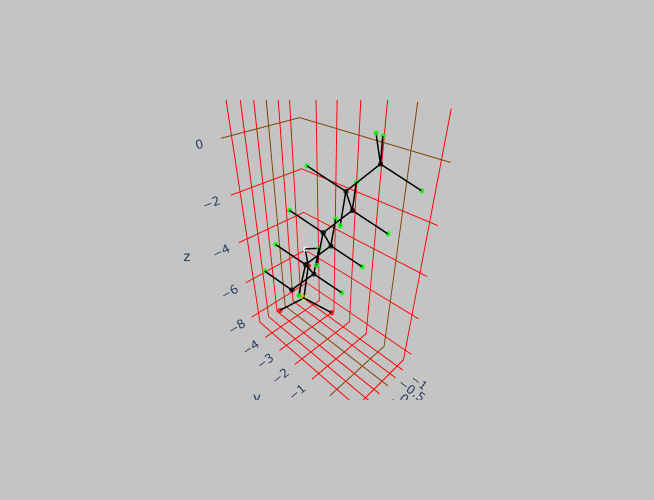

In [17]:
################################C-F BDEs########################## 

def iterate_write_remove_fluoride(chain,head_name,\
                                        chain_length,write_directory):
    i = chain_length - 2
    for j in range(0,i+1):
        mol_accum = chain.copy()
        name = f"{head_name}_CF2_{i-j}_CF_CF2_{j}_CF3"
        cf_bde = mol_accum.remove_atoms([f"F{(j+2)*3}"])
        cf_bde.set_name(name).write_xyz(directory=write_directory)
        print(f"shown below: {name}")
        cf_bde.show()
        
    
#all of the radicals formed by breaking off a (non-terminal) fluorine
def iterate_write_cf_bdes_all_lengths(starting_structure,chain_group,\
                      head_name,min_chain_length,max_chain_length,write_directory):
    counter = 0
    
    mol_accum = starting_structure.copy()
    if min_chain_length < 2:
        raise ValueError('Minimum chain length must be at least 2')
    for chain_length in range(2,max_chain_length + 1):
        mol_accum = chain_group.bs('1').join(mol_accum.bs('2'))
        if chain_length >= min_chain_length:
            iterate_write_remove_fluoride(mol_accum,head_name,chain_length,write_directory)

root = 'data/kimberley/'
n_8_sulfonic_acid_cf_bdes_dir = root + 'n_8_sulfonic_acid_cf_bdes'
os.makedirs(n_8_sulfonic_acid_cf_bdes_dir,exist_ok=True)
#RSO3H(mol_accum,head_name,
iterate_write_cf_bdes_all_lengths(cf3so3h,cf4,'HSO3',8,8,n_8_sulfonic_acid_cf_bdes_dir)


# n_8_sulfonate_cf_bdes_dir = root + 'n_8_sulfonate_cf_bdes'
# os.makedirs(n_8_sulfonate_cf_bdes_dir,exist_ok=True)
# #RSO3
# iterate_write_cf_bdes_all_lengths(cf3so3,cf4,'SO3',8,8,n_8_sulfonate_cf_bdes_dir)


# n_8_carboxylic_acid_cf_bdes_dir = root + 'n_8_carboxylic_acid_cf_bdes'
# os.makedirs(n_8_carboxylic_acid_cf_bdes_dir,exist_ok=True)
# #RCO2H
# iterate_write_cf_bdes_all_lengths(cf3co2h,cf4,'HCO2',8,8,n_8_carboxylic_acid_cf_bdes_dir)

# n_8_carboxylate_cf_bdes_dir = root + 'n_8_carboxylate_cf_bdes'
# os.makedirs(n_8_carboxylate_cf_bdes_dir,exist_ok=True)
# #RCO2
# iterate_write_cf_bdes_all_lengths(cf3co2,cf4,'CO2',8,8,n8_carboxylate_cf_bdes_dir)

In [ ]:
#we have done it! the 184 iterable structures.
#now we have to make the miscellaneous ones,
#such as the fluoride ions and radicals,
#acid acceptors,
#electron donors, etc.
#ask Kimberly what she used, and check literature for these as well.

#next time I sit down to work, will do that ^, and will
#start all these calculations,

#and will start calculations for Michael as well.